In [1]:
import pandas as pd

wine_df = pd.read_csv('./new_wine_df_all.csv',index_col= 0)
wine_df

,이름,영문이름,종류,나라,생산지,제조사,포도품종,알코올도수,가격,평점,산도,당도,바디감,탄닌,인기순위,추천순위,구매가능여부,주소,이미지주소
2,아발론 카베르네소비뇽,AVALON CALIFORNIA,Red,미국,캘리포니아,아발론 와이너리,"까베르네 소비뇽 (Cabernet Sauvignon) 76%, 시라 (Syrah) ...",13.8,24900,3.5,3,1,3,3,3,514,구매 예약,https://www.winenara.com/shop/product/product_...,https://www.winenara.com/uploads/product/550/6...
4,이자디 엘 레갈로,IZADI EL REGALO,Red,스페인,리오하,보데가스 이자디 (Bodegas Izadi),"템프라니요 (Tempranillo) 90%, 가르나차 (Garnacha), 그라시아...",14.1,77000,4.0,3,0,4,3,5,155,구매 불가,https://www.winenara.com/shop/product/product_...,https://www.winenara.com/uploads/product/550/1...
6,빌라 안티노리 키안티 클라시코 리제르바,VILLA ANTINORI CHIANTI CLASSICO RISERVA,Red,이탈리아,"토스카나, 키안티 클라시코",안티노리,"산지오베제 90%, 카베르네 소비뇽 10%",14.0,39000,4.0,3,0,3,4,7,117,구매 불가,https://www.winenara.com/shop/product/product_...,https://www.winenara.com/uploads/product/550/1...
7,톨퍼들 빈야드 샤르도네,TOLPUDDLE VINEYARD CHARDONNAY,White,호주,"호주, 타스매니아",SHAW AND SMITH,샤르도네(CHARDONNAY) 100%,12.5,100000,4.2,3,0,4,0,8,54,구매 불가,https://www.winenara.com/shop/product/product_...,https://www.winenara.com/uploads/product/550/2...
8,프루노토 모스카토 다스티,PRUNOTTO MOSCATO D'ASTI,Sparkling,이탈리아,"피에몬테, 아스티","프루노토, 안티노리",까넬리 모스카토 비앙코(Canelli Moscato Bianco) 100%,5.0,25000,4.0,1,5,2,0,9,444,구매 불가,https://www.winenara.com/shop/product/product_...,https://www.winenara.com/uploads/product/550/9...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,일 까르보나이오네,IL CARBONAIONE,Red,이탈리아,토스카나,포데레 포죠 스칼레테,산지오베제 디 라몰레 (Saniovese di Lamole) 100%,13.5,200000,4.1,4,1,4,3,625,484,구매 예약,https://www.winenara.com/shop/product/product_...,https://www.winenara.com/uploads/product/550/6...
625,레 디페제,LE DIFESE,Red,이탈리아,"토스카나, 볼게리",테누타 산 귀도,"까베르네 소비뇽 (Cabernet Sauvignon) 70%, 산지오베제 (Sang...",13.5,48000,3.8,3,1,3,3,626,508,구매 불가,https://www.winenara.com/shop/product/product_...,https://www.winenara.com/uploads/product/550/6...
626,끌로 모가도르,CLOS MOGADOR,Red,스페인,프리오라트,끌로 모가도르,"가르나차 45%, 까리냥 29%, 시라 16%, 카베르네 소비뇽 10%",15.0,290000,4.4,4,0,4,4,627,522,구매 예약,https://www.winenara.com/shop/product/product_...,https://www.winenara.com/uploads/product/550/6...
627,샤또 드 샤미레 메르퀴레 화이트,CHATEAU DE CHAMIREY MERCUREY WHITE,White,프랑스,"부르고뉴, 꼬뜨 샬로네즈, 메르퀴레",샤또 드 샤미레,샤르도네 (Chardonnay),13.5,89000,3.9,3,0,3,0,628,533,구매 예약,https://www.winenara.com/shop/product/product_...,https://www.winenara.com/uploads/product/550/5...


In [2]:
rating = wine_df[['이름','평점']]
rating = rating.reset_index()
rating.columns = ['순위','이름','평점']
rating.순위 = rating.순위+1

In [3]:
from sklearn.preprocessing import MinMaxScaler
rating['순위지수'] = MinMaxScaler().fit_transform(rating[['순위']])

In [6]:
rating['평점지수'] = rating.평점 + (1 - rating.순위지수)/1.5

In [8]:
from sklearn.preprocessing import StandardScaler
rating['순위지수'] = StandardScaler().fit_transform(rating[['순위']])

In [13]:
rating['평점지수'] = rating.평점 + (1 - rating.순위지수)/3

In [14]:
rating

,순위,이름,평점,순위지수,평점지수
0,3,아발론 카베르네소비뇽,3.5,-1.623759,4.374586
1,5,이자디 엘 레갈로,4.0,-1.612602,4.870867
2,7,빌라 안티노리 키안티 클라시코 리제르바,4.0,-1.601445,4.867148
3,8,톨퍼들 빈야드 샤르도네,4.2,-1.595867,5.065289
4,9,프루노토 모스카토 다스티,4.0,-1.590288,4.863429
...,...,...,...,...,...
369,625,일 까르보나이오네,4.1,1.846096,3.817968
370,626,레 디페제,3.8,1.851674,3.516109
371,627,끌로 모가도르,4.4,1.857253,4.114249
372,628,샤또 드 샤미레 메르퀴레 화이트,3.9,1.862831,3.612390


In [16]:
wine_df_save = pd.merge(wine_df,rating[['이름','평점지수']])

In [17]:
wine_df_save.to_csv('wine_df_all_save.csv')

In [48]:
wine_df[(wine_df.종류 =='Red')&(wine_df.당도 == 2)]

,이름,영문이름,종류,나라,생산지,제조사,포도품종,주포도품종,알코올도수,가격,평점,산도,당도,바디감,탄닌,주소
195,리아논 레드 블렌드,Rhiannon Red Blend,Red,미국,"캘리포니아, 로다이",러더포드 와인 컴퍼니,"쁘띠 쉬라 57%, 쉬라 37%, 바르베라 3%","쁘띠 쉬라 57%, 쉬라 37%, 바르베라 3%",13.5,50000,3.9,4,2,4,3,https://www.winenara.com/goods/goods_view.php?...
507,우르바노,URBANO,Red,스페인,까스티야 라 만차,NaN,"템프라니요, 카베르네 소비뇽","템프라니요, 카베르네 소비뇽",12.5,18000,2.9,3,2,3,2,https://www.winenara.com/goods/goods_view.php?...


<AxesSubplot:>

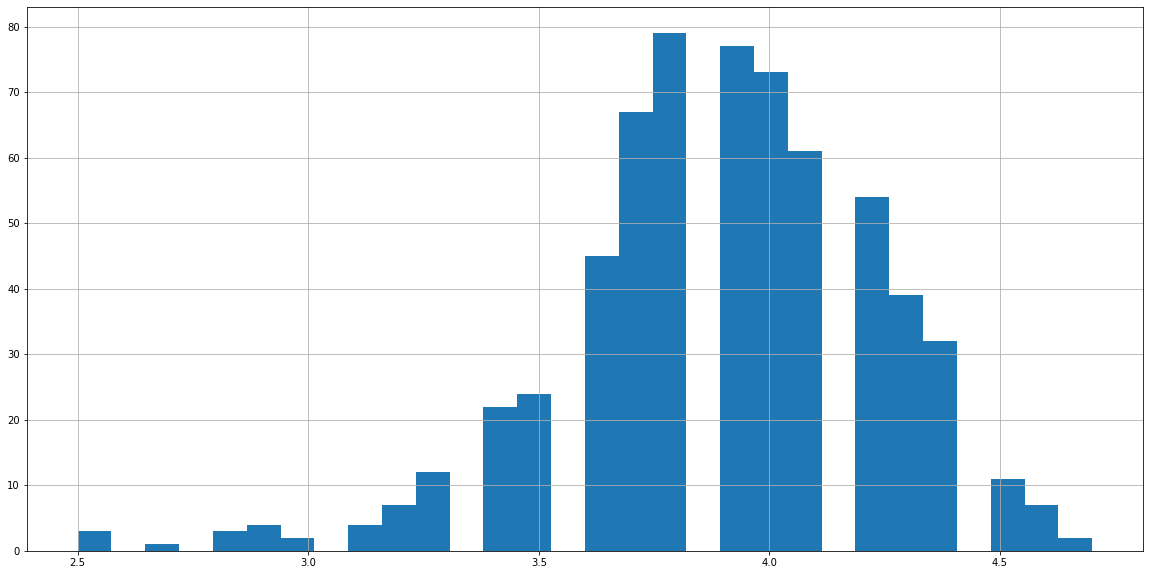

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
wine_df.평점.hist(bins = 30)

<AxesSubplot:>

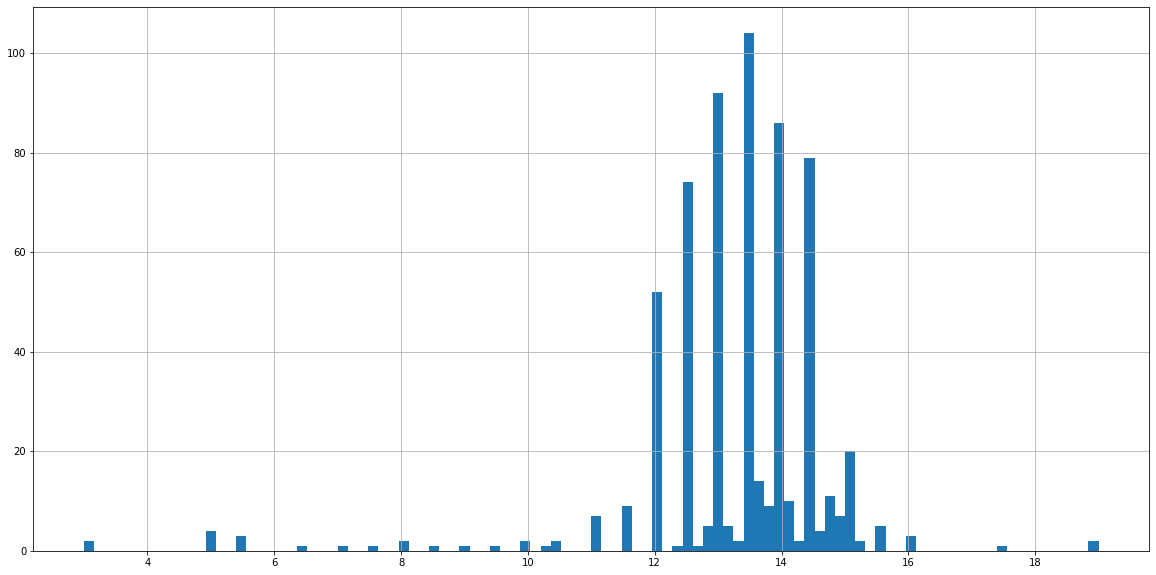

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
wine_df.알코올도수.hist(bins = 100)

In [ ]:
# 알코올 도수 범주화 : 12미만 , 12~13미만, 13이상~14미만 , 14이상

<AxesSubplot:>

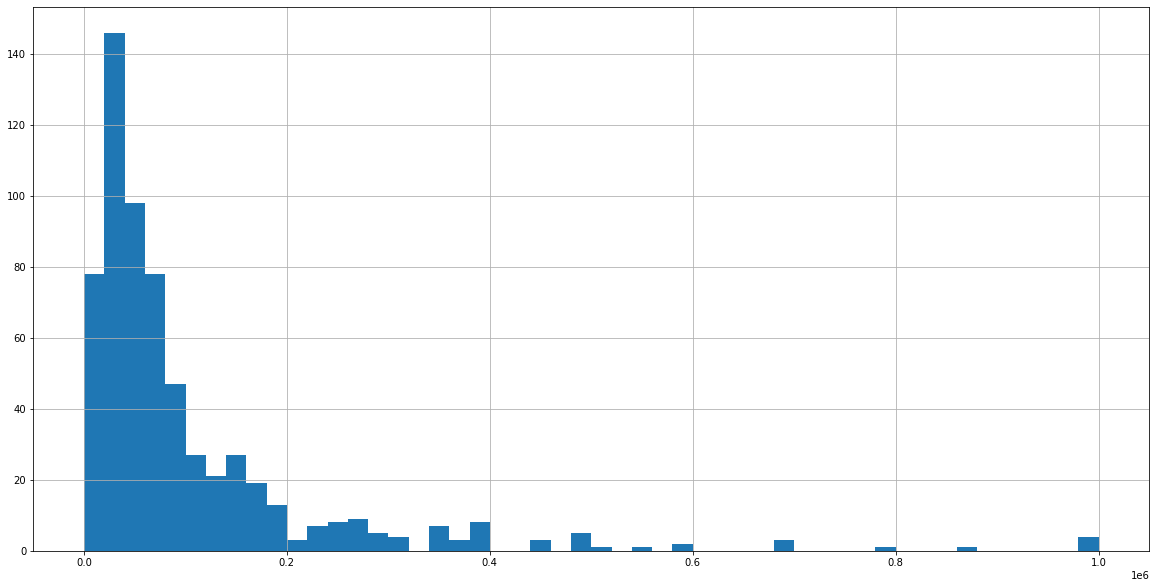

In [60]:
plt.figure(figsize=(20,10))
wine_df.가격.hist(bins = 50)

<AxesSubplot:>

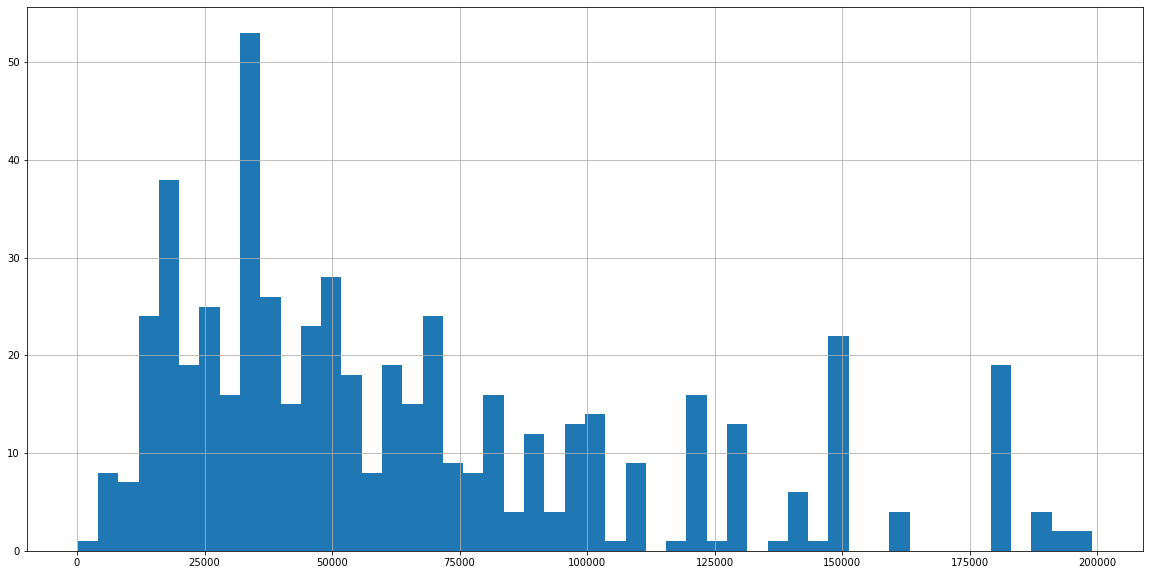

In [62]:
plt.figure(figsize=(20,10))
wine_df.가격[wine_df.가격<200000].hist(bins = 50)

<AxesSubplot:>

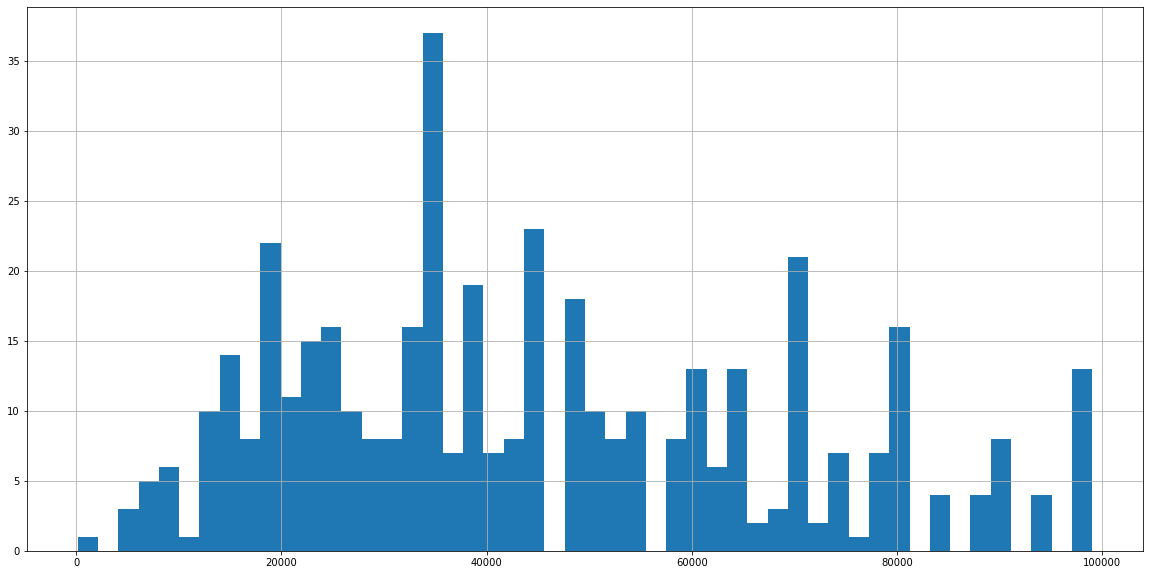

In [63]:
plt.figure(figsize=(20,10))
wine_df.가격[wine_df.가격<100000].hist(bins = 50)

In [51]:
def get_category(column):
    cat = ''                #여기에 저장됨
    if column > : cat = 'A'
    elif : cat = 'B'
    else:
        cat = 'C'
    return cat

SyntaxError: invalid syntax (Temp/ipykernel_5036/950309189.py, line 3)

In [ ]:
wine_df[wine_df.종류 =='Red'].탄닌.value_counts()

3    187
4    133
2     35
5     16
0      8
1      3
Name: 탄닌, dtype: int64

In [ ]:
wine_df[wine_df.종류 =='Red'].당도.value_counts()

0    238
1    134
3      5
4      3
2      2
Name: 당도, dtype: int64

In [ ]:
wine_df[wine_df.종류 =='White'].당도.value_counts()

0    99
1    50
2     9
4     7
3     1
Name: 당도, dtype: int64

In [ ]:
wine_df[wine_df.종류 =='Sparkling'].당도.value_counts()

0    16
1     9
4     3
5     2
2     1
Name: 당도, dtype: int64

In [ ]:
wine_df[wine_df.종류 =='Rose'].당도.value_counts()

0    7
1    5
4    2
3    2
Name: 당도, dtype: int64

In [ ]:
wine_df[wine_df.종류 =='Champagne'].당도.value_counts()

0    25
1     9
Name: 당도, dtype: int64

In [ ]:
wine_df[wine_df.종류 =='Red'].산도.value_counts()

3    257
4     98
2     21
1      4
5      2
Name: 산도, dtype: int64

In [ ]:
wine_df[wine_df.종류 =='White'].산도.value_counts()

3    110
4     41
2      9
1      5
5      1
Name: 산도, dtype: int64

In [ ]:
wine_df[wine_df.종류 =='Sparkling'].산도.value_counts()

3    18
4     7
1     3
2     3
Name: 산도, dtype: int64

In [ ]:
wine_df[wine_df.종류 =='Rose'].산도.value_counts()

3    12
2     2
1     1
4     1
Name: 산도, dtype: int64

In [ ]:
wine_df[wine_df.종류 =='Champagne'].산도.value_counts()

3    23
4     6
5     3
2     1
1     1
Name: 산도, dtype: int64

In [ ]:
wine_df[wine_df.종류 =='Red'].바디감.value_counts()

4    181
3    145
5     35
2     19
1      1
0      1
Name: 바디감, dtype: int64

In [ ]:
wine_df[wine_df.종류 =='White'].바디감.value_counts()

3    72
2    56
4    32
1     4
5     2
Name: 바디감, dtype: int64

In [ ]:
wine_df[wine_df.종류 =='Sparkling'].바디감.value_counts()

2    13
3    11
4     5
1     1
5     1
Name: 바디감, dtype: int64

In [ ]:
wine_df[wine_df.종류 =='Rose'].바디감.value_counts()

2    10
3     4
4     1
1     1
Name: 바디감, dtype: int64

In [ ]:
wine_df[wine_df.종류 =='Champagne'].바디감.value_counts()

3    18
4    11
2     4
5     1
Name: 바디감, dtype: int64

In [ ]:
wine_df[wine_df.종류 =='Red'].탄닌.value_counts()

3    187
4    133
2     35
5     16
0      8
1      3
Name: 탄닌, dtype: int64

In [ ]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   이름      629 non-null    object 
 1   영문이름    629 non-null    object 
 2   종류      629 non-null    object 
 3   나라      629 non-null    object 
 4   생산지     627 non-null    object 
 5   제조사     610 non-null    object 
 6   포도품종    627 non-null    object 
 7   주포도품종   627 non-null    object 
 8   알코올도수   629 non-null    object 
 9   가격      629 non-null    int64  
 10  평점      629 non-null    float64
 11  산도      629 non-null    int64  
 12  당도      629 non-null    int64  
 13  바디감     629 non-null    int64  
 14  탄닌      629 non-null    int64  
 15  주소      629 non-null    object 
dtypes: float64(1), int64(5), object(10)
memory usage: 83.5+ KB
